# Import the libraries

In [1]:
import pandas as pd
import numpy as np

# Import the data

In [2]:
df_raw = pd.read_csv('Index2018.csv')

In [3]:
df_comp = df_raw.copy()     #duplicating the original copy of the csv


# Exploring the Data

In [4]:
df_comp.head()                        # S&P 500(USA), Dax 30(German), FTSE 100(London), Nikkei 225(Japan) - 

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.tail()

,date,spx,dax,ftse,nikkei
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88
6268,29/01/2018,2853.528411,13324.48,7671.533300,23629.34


In [6]:
df_comp.describe() # to understand the data more clearly

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.isna().sum()   # checking for the null values

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting the  time series data

In [8]:
import matplotlib.pyplot as plt

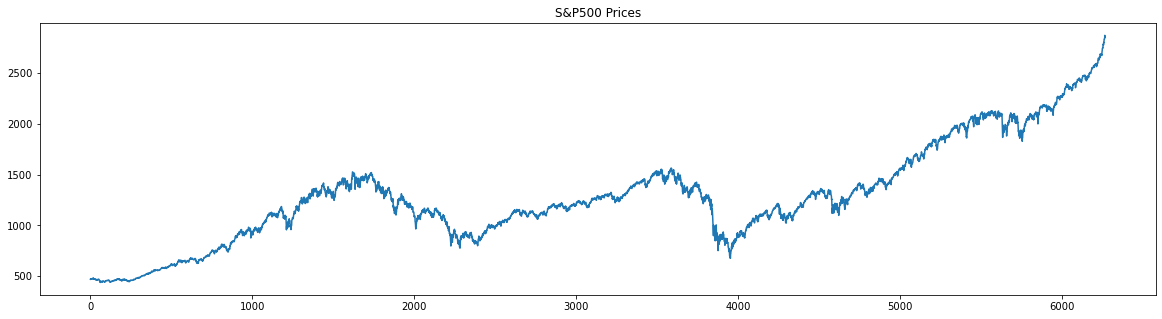

In [9]:
df_comp.spx.plot(figsize= (20,5), title = "S&P500 Prices")
plt.show()

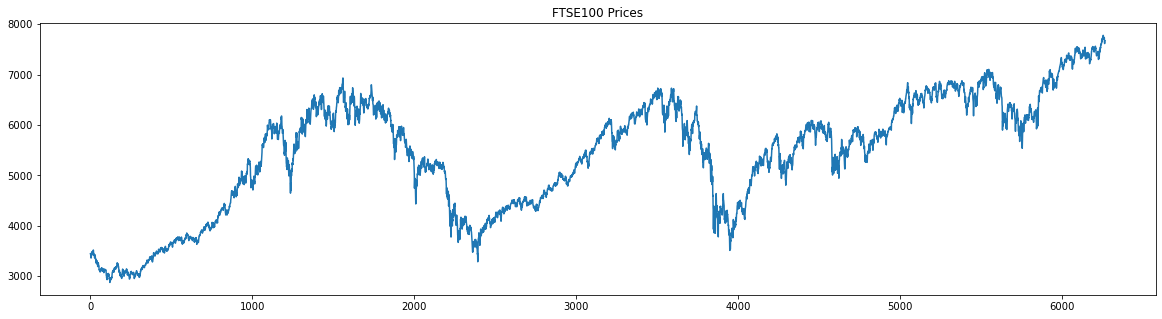

In [10]:
df_comp.ftse.plot(figsize= (20,5), title = "FTSE100 Prices")
plt.show()

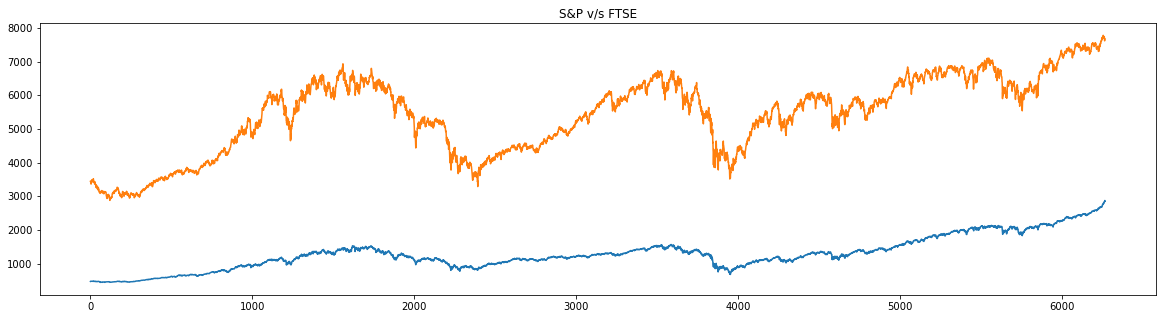

In [11]:
df_comp.spx.plot(figsize=(20,5), title=" S&P500 Prices")
df_comp.ftse.plot(figsize=(20,5), title=" FTSE100 Prices")
plt.title("S&P v/s FTSE")
plt.show()

 # The Quantile-Quantile plot (QQ-Plot)
 -  It is used in analytics to determine whether the data is distributed in certain way.
 - Usually showcases how the data fits a Normal Distribution.
 

In [12]:
import scipy.stats # we need tp call a prob function from scipy.stats
import pylab

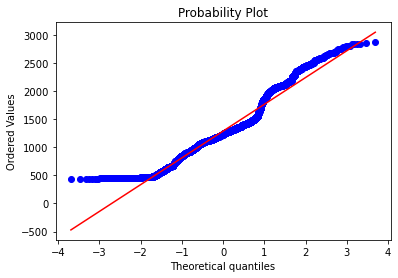

In [13]:
scipy.stats.probplot(df_comp.spx, plot=pylab) # it takes two arguments (series, plot)
pylab.show()

- Here the qq plot takes all the values a variablec can take, and arranges them in ascending order.
- Y-axis: expresses the prices highest at the top and lowest at the bottom.
- X-axis: Expresses theoretical quantiles/ How many standard deviations away from the mean these values are.
- The red line represents what the data points should follow, if they are Normally Distributed.
- In this case we see that there are more values around the 500 makr on the Y-axis. Therefore the data is not normally distributed.
- And cannot use the elegant statistics of normal distributions to make successful forecast.However, this is what we usually expect from the time series data.

# Transforming the "date" column - "date type"

In [14]:
df_comp.date.describe()

count           6269
unique          6269
top       17/06/2011
freq               1
Name: date, dtype: object

In [15]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # here the dayfirst is set to True as the format : mm/dd/yyyy

In [16]:
df_comp.date.describe()

<ipython-input-16-68f1cb45f47c>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1999-11-12 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Using Dates as indices

- In a time series data, each value is corresponde to a time period.
- we often wish to examine specific chunks of data between two concrete dates.
- seperating the data  before and after September 15th 2008.
- we need to use the associated time periods as indices.

In [17]:
df_comp.set_index("date", inplace = True)


In [18]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [19]:
# df_comp.date.describe() # the below error is because the date is index now 

# Setting the frequency of the dataset

In [20]:
df_comp = df_comp.asfreq('d')  #the parameters we use: a- anually, m-monthly, d-daily, h-hourly, w-weekly

In [21]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


- here the values on jan 8th and 9th are null values, generally we have to find the ways to impute these missing values but the data here reresents:
- closing prices of financial indices.
- can only be recorded during working days.
- so we are not intrested in any weekends or holidays. when we check the calender jan 8th and 9th are find to be weekends. 
- therefore we have to use another parameter when setting the frequency for only business days.
- use 'b' - for business days.


In [22]:
df_comp = df_comp.asfreq('b')  # b- business days

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


# Handling the missing values

In [24]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [25]:
df_comp.spx = df_comp.spx.fillna(method = "ffill")

In [26]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [27]:
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")

In [28]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [29]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [30]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [31]:
df_comp.nikkei = df_comp.nikkei.fillna(value = df_comp.nikkei.mean())

In [32]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Adding and Removing columns in a DataFrame

In [33]:
df_comp['market_value'] = df_comp.spx

In [34]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [35]:
del df_comp['spx'],df_comp['dax'],df_comp['ftse'],df_comp['nikkei']

In [36]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


# Splitting the dataset

In [37]:
size = int(len(df_comp)*0.8) # to assign the 80% of the dataset to train 

In [38]:
df_train = df_comp.iloc[:size]

In [39]:
df_test = df_comp.iloc[size:]

In [40]:
df_train.tail()       

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [41]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


- here the tail and head methods help us to check the splitting process

# White Noise: It is a special type of time-series, where the data doesn't follow a pattern


- conditions for white noise: constant-mean, constant variance and no auto-correlation.
- No auto-corellation = NO clear relationship between past and present values of a series

In [44]:
wn = np.random.normal(loc = df_train.market_value.mean(), scale = df_train.market_value.std(), size = len(df_train))

In [45]:
df_train['wn'] = wn

<ipython-input-45-f6be5693b358>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn'] = wn


In [46]:
df_train.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1088.689946
std,292.559287,294.689971
min,438.920000,88.075607
25%,914.620000,890.079320
50%,1144.650000,1084.685674
75%,1316.280729,1283.142057
max,1570.252238,2144.811339


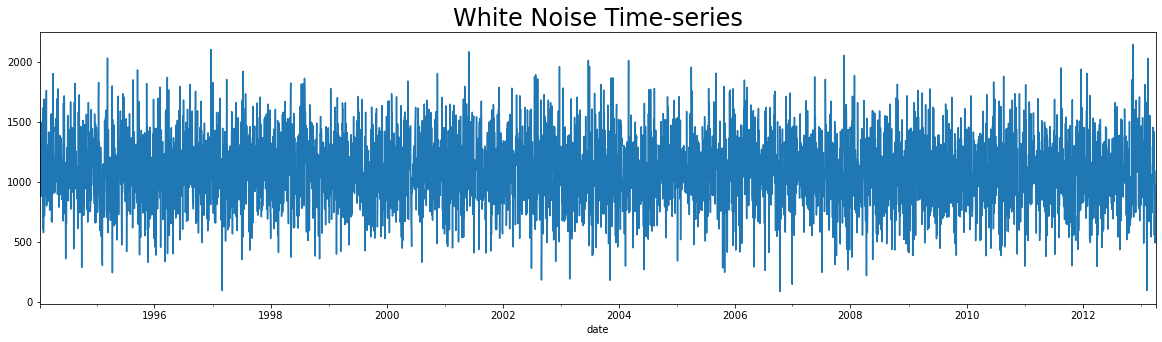

In [48]:
df_train.wn.plot(figsize=(20,5))
plt.title("White Noise Time-series", size = 24)
plt.show()

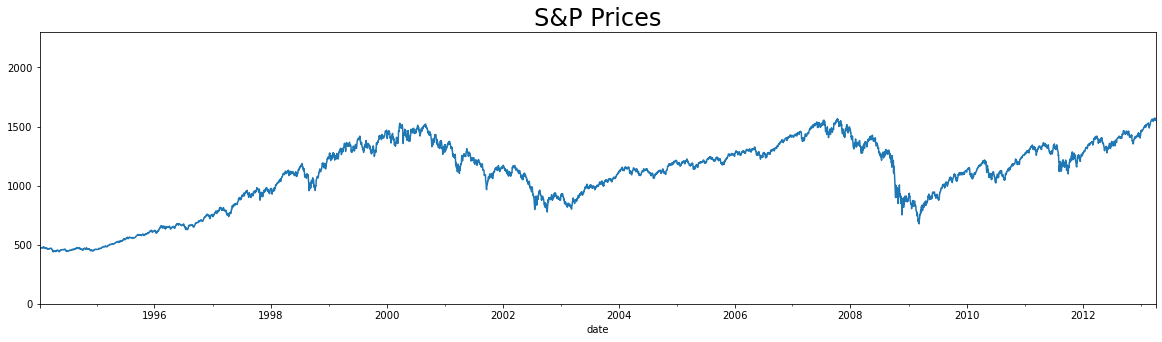

In [50]:
df_train.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0,2300)
plt.show()

# Random Walk
- A special type of time series, where values tend to persist over time and the differences between periods are simply white noise

In [55]:
rw = pd.read_csv('Randwalk.csv/Randwalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')

In [56]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [58]:
df_train['rw'] = rw.price

<ipython-input-58-33ac397a4ef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['rw'] = rw.price


In [61]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1092.628743,1122.139662
1994-01-10,475.27,1031.712252,1080.347860
1994-01-11,474.13,955.121561,1082.095245
1994-01-12,474.17,1107.768179,1083.639265
1994-01-13,472.47,876.546821,1067.146255


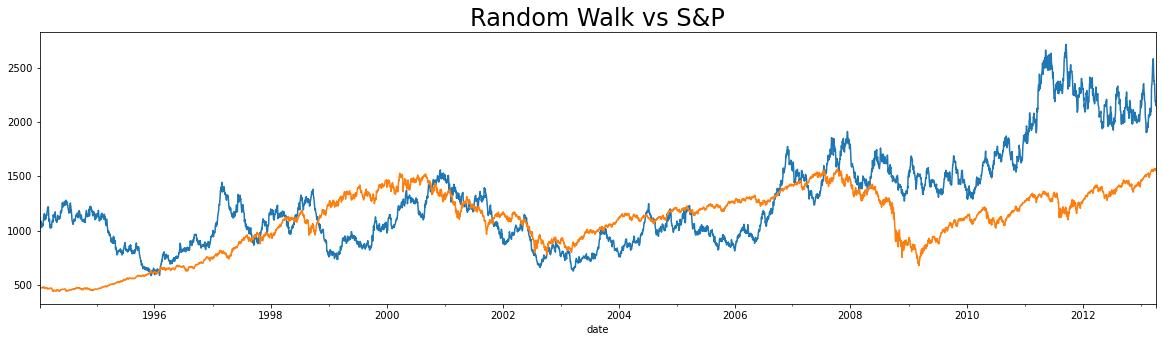

In [63]:
df_train.rw.plot(figsize = (20,5))
df_train.market_value.plot()
plt.title('Random Walk vs S&P', size= 24)
plt.show()